<a href="https://colab.research.google.com/github/Konoko2004/TheProject/blob/main/yFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install related libraries

!pip install yfinance
!pip install dash
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from datetime import date

In [14]:
#test list comprehension with unpacking function
import collections

persontype = collections.namedtuple('person',['first_Name','last_Name','Age'])
profiles = [['Winston','Loke',31],['Ad','Loke',22]]

namedpeople = [persontype(*i) for i in profiles]
namedpeople




[person(first_Name='Winston', last_Name='Loke', Age=31),
 person(first_Name='Ad', last_Name='Loke', Age=22)]

In [ ]:
# df1 = pd.DataFrame([[1,2,3,4]],
#                    columns = ['a','b','c','d'])
# df2 = pd.DataFrame([[1,2,3,4,5],[1,4,9,16,25],[1,16,87,12,41]],
#                    columns = ['a','b','c','d','e'])

# print(pd.concat([df1,df2],axis=1))

     a    b    c    d  a   b   c   d   e
0  1.0  2.0  3.0  4.0  1   2   3   4   5
1  NaN  NaN  NaN  NaN  1   4   9  16  25
2  NaN  NaN  NaN  NaN  1  16  87  12  41


In [ ]:
# Function to create a DF of a ticker. We will add them to a class of stocks later.

# def create_Stock(tickerName):
#     stock = yf.Ticker(tickerName)
#     stockhistory = stock.history(period = '1y')
#     stock_df = pd.DataFrame(stockhistory)
#     stock_df['Ticker'] = tickerName
#     stock_df.reset_index(inplace = True) # push date index to become a column.
#     stock_df['Date'] = stock_df['Date'].dt.strftime('%d/%m/%Y')  #dd/mm/yyyy format.
#     return stock_df

In [2]:
def create_Stock(*tickerName):

    frames = []

    for i in tickerName:
        stock = yf.Ticker(i)
        stockhistory = stock.history(period = 'max')
        stock_df = pd.DataFrame(stockhistory)
        stock_df['Ticker'] = i
        stock_df.reset_index(inplace = True)                                    #push date index to become a column
        stock_df['Date'] = stock_df['Date'].dt.strftime('%d/%m/%Y')             #dd/mm/yyyy format
        frames.append(stock_df)
    
    return frames
        
    

In [3]:
stockList = create_Stock('nio','tsla','msft','pltr')
stockList = pd.concat(stockList)
stockList['High-Low'] = stockList['High'] - stockList['Low']
stockList = stockList[['Date','Ticker','Open','High','Low','Close','High-Low','Volume','Dividends','Stock Splits']]
stockList['Ticker'].unique()

array(['nio', 'tsla', 'msft', 'pltr'], dtype=object)

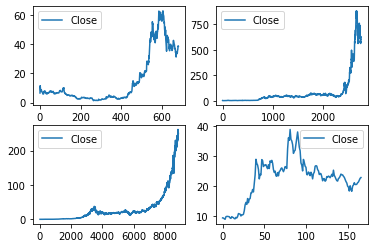

In [10]:


#Store each ticker in a list with seperate index
#so that we can plot each stock later on

TickerDF = []
stock_count = len(stockList['Ticker'].unique())
for i in stockList['Ticker'].unique():
    TickerDF.append(stockList[stockList['Ticker'] ==i])

#set plt figure axes
df_counter = 0
nrow = 2
ncol = 2


#create subplots
# plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
# Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax.
# fig, axes = plt.subplots  is more concise than using fig = plt.figure()

fig, axes = plt.subplots(nrow, ncol)

for i in range(nrow):
    
    for j in range(ncol):
        
        if (len(TickerDF) > df_counter):

            TickerDF[df_counter][['Date','Close']].plot(ax=axes[i,j])
            
            df_counter += 1


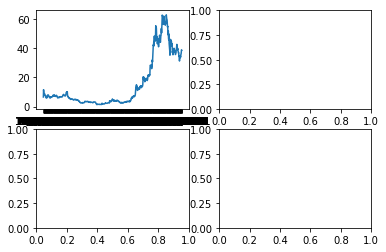

In [45]:
df_counter = 0
nrow = 2
ncol = 2

fig, axes = plt.subplots(nrow, ncol)

axes[0,0].plot(TickerDF[0]['Date'],TickerDF[0]['Close'])

In [38]:
TickerDF[0][['Date','Close']].plot(ax=axes)

,Date,Ticker,Open,High,Low,Close,High-Low,Volume,Dividends,Stock Splits
0,12/09/2018,nio,6.000000,6.930000,5.350000,6.600000,1.580000,66849000,0.0,0.0
1,13/09/2018,nio,6.620000,12.690000,6.520000,11.600000,6.170000,158346500,0.0,0.0
2,14/09/2018,nio,12.660000,13.800000,9.220000,9.900000,4.580000,172473600,0.0,0.0
3,17/09/2018,nio,9.610000,9.750000,8.500000,8.500000,1.250000,56323900,0.0,0.0
4,18/09/2018,nio,8.730000,9.100000,7.670000,7.680000,1.430000,41827600,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
678,24/05/2021,nio,34.259998,36.490002,33.560001,35.889999,2.930000,67244400,0.0,0.0
679,25/05/2021,nio,36.320000,37.639999,35.689999,36.070000,1.950001,76628000,0.0,0.0
680,26/05/2021,nio,36.250000,38.080002,36.070000,37.759998,2.010002,55929000,0.0,0.0
681,27/05/2021,nio,37.950001,38.980000,37.180000,38.910000,1.799999,53064400,0.0,0.0


0
1


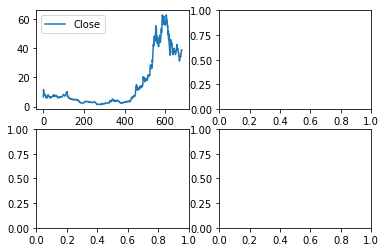

In [ ]:
fig, axes = plt.subplots(2, 2)
TickerDF[0][['Date','Close']].plot(ax=axes[0,0])


TickerDF

for i in range(ncol):
  print(i)

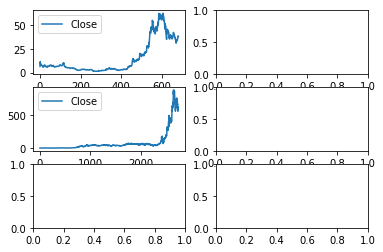

In [ ]:
#Example of Multi plotting


fig, axes = plt.subplots(3, 2)
TickerDF[0][['Date','Close']].plot(ax = axes[0,0])
TickerDF[1][['Date','Close']].plot(ax = axes[1,0])

AttributeError: ignored

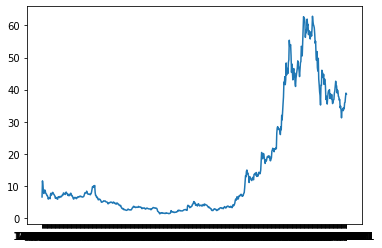

In [ ]:
fig, ax = plt.subplots()
ax.plot(stockList[stockList['Ticker']=='nio']['Date'],stockList[stockList['Ticker']=='nio']['Close'])
fig.plot(stockList[stockList['Ticker']=='tsla']['Date'],stockList[stockList['Ticker']=='tsla']['Close'])

In [ ]:
fig = plt.figure()
n = 1                                                                           #Axes count

print(list(enumerate(TickerDF)))

[(0,            Date Ticker       Open  ...     Volume  Dividends  Stock Splits
0    12/09/2018    nio   6.000000  ...   66849000        0.0           0.0
1    13/09/2018    nio   6.620000  ...  158346500        0.0           0.0
2    14/09/2018    nio  12.660000  ...  172473600        0.0           0.0
3    17/09/2018    nio   9.610000  ...   56323900        0.0           0.0
4    18/09/2018    nio   8.730000  ...   41827600        0.0           0.0
..          ...    ...        ...  ...        ...        ...           ...
678  24/05/2021    nio  34.259998  ...   67244400        0.0           0.0
679  25/05/2021    nio  36.320000  ...   76628000        0.0           0.0
680  26/05/2021    nio  36.250000  ...   55929000        0.0           0.0
681  27/05/2021    nio  37.950001  ...   53064400        0.0           0.0
682  28/05/2021    nio  38.740002  ...   58159400        0.0           0.0

[683 rows x 10 columns]), (1,             Date Ticker        Open  ...    Volume  Dividends  S

<Figure size 432x288 with 0 Axes>

In [ ]:
nio_tidied = pd.melt(nio,id_vars=['Volume','Dividends','Stock Splits','Date','Ticker'],
                     var_name='Position',value_name = 'Price')

nio_tidied

,Volume,Dividends,Stock Splits,Date,Ticker,Position,Price
0,59847900,0,0,26/05/2020,nio,Open,3.420000
1,70718900,0,0,27/05/2020,nio,Open,4.010000
2,62756900,0,0,28/05/2020,nio,Open,3.980000
3,50303000,0,0,29/05/2020,nio,Open,3.820000
4,69222000,0,0,01/06/2020,nio,Open,4.000000
...,...,...,...,...,...,...,...
1265,48991700,0,0,20/05/2021,nio,High-Low,0.869999
1266,49419300,0,0,21/05/2021,nio,High-Low,0.910000
1267,67244400,0,0,24/05/2021,nio,High-Low,2.930000
1268,76545800,0,0,25/05/2021,nio,High-Low,1.950001
